In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway


## Simulacion de Terremotos

In [2]:
# Datos para la simulación
lamda_poisson = 2.5
n_muestra = 1000
sim_poisson = np.random.poisson(lamda_poisson, n_muestra)

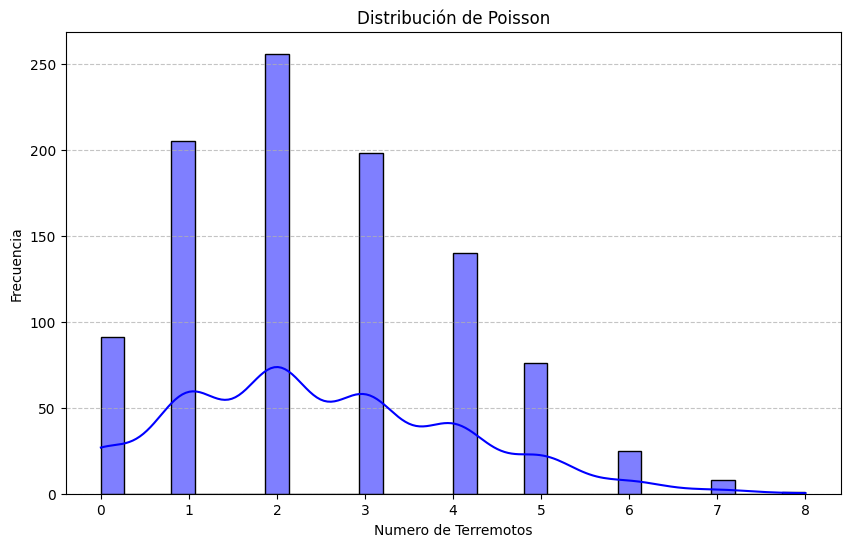

In [3]:
# visualización de la simulacion

plt.figure(figsize=(10, 6))
sns.histplot(sim_poisson, kde=True, color='blue', bins=30)
plt.title('Distribución de Poisson')
plt.xlabel('Numero de Terremotos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--' , alpha=0.75)
plt.show()

## Comprobacion de Campaña de Marketing

In [4]:
# Crear DataFrame con los datos de la campaña de marketing

df_marketing = pd.read_csv('marketing_campaign.csv')
df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Comprobacion de hipotesis
H0: No tiene relacion entre la cantidad de compras en linea y el numero de visitas

H1: Existe relacion entre la cantidad de compras en linea y el numero de visitas

In [5]:
pd.options.display.float_format = '{:.2f}'.format
df_marketing[['NumWebVisitsMonth','NumWebPurchases']].describe()

,NumWebVisitsMonth,NumWebPurchases
count,2240.00,2240.00
mean,5.32,4.08
std,2.43,2.78
min,0.00,0.00
25%,3.00,2.00
50%,6.00,4.00
75%,7.00,6.00
max,20.00,27.00


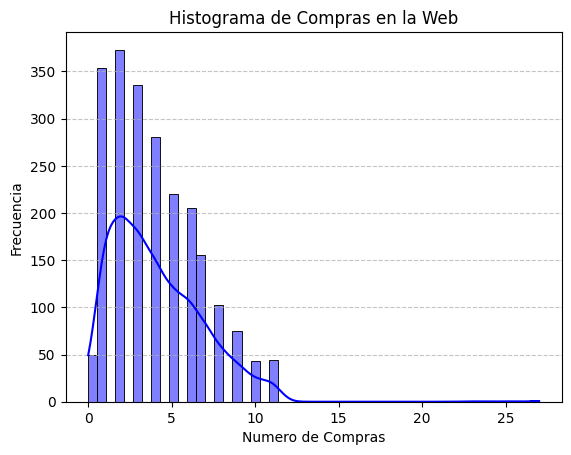

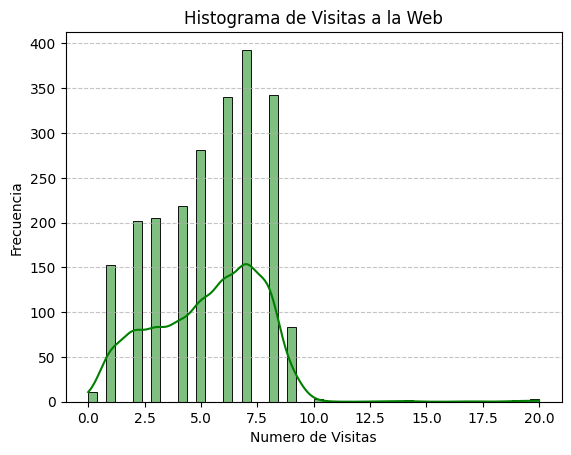

In [6]:
# Comprobacion de hipotesis de la campaña de marketing
# Contraste de NumWebPurchases con respecto a NumWebVisitsMonth

# Visualización de los datos

sns.histplot(df_marketing['NumWebPurchases'], kde=True, color='blue', bins=50)
plt.title('Histograma de Compras en la Web')
plt.xlabel('Numero de Compras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--' , alpha=0.75)
plt.show()

sns.histplot(df_marketing['NumWebVisitsMonth'], kde=True, color='green', bins=50)
plt.title('Histograma de Visitas a la Web')
plt.xlabel('Numero de Visitas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--' , alpha=0.75)
plt.show()

In [7]:
# correlacion entre las variables NumWebVisitsMonth y NumWebPurchases

correlacion, p_value = pearsonr(df_marketing['NumWebVisitsMonth'], df_marketing['NumWebPurchases'])
print(f'La correlación entre las variables NumWebVisitsMonth y NumWebPurchases es de: {correlacion}')
print(f'El p-value es de: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')



La correlación entre las variables NumWebVisitsMonth y NumWebPurchases es de: -0.05584633165982065
El p-value es de: 0.008200075803008177
Se rechaza la hipotesis nula


In [19]:
# Agrupar los clientes por vistitas a la web

clientes_masfrec = df_marketing[df_marketing['NumWebVisitsMonth'] > 5]
clientes_menosfrec = df_marketing[df_marketing['NumWebVisitsMonth'] <= 5]

# Realizar la prueba de ANOVA

f_stat, p_value = stats.f_oneway(clientes_masfrec['NumWebPurchases'], clientes_menosfrec['NumWebPurchases'])

print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}') 
# Interpretación del valor p 
alpha = 0.05 
if p_value < alpha: print("Rechazamos la hipótesis nula. \nHay una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.") 
else: print("No podemos rechazar la hipótesis nula. \nNo hay una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.")

Estadístico F: 8.503662361325567
Valor p: 0.003579582330884487
Rechazamos la hipótesis nula. 
Hay una diferencia significativa en el número de compras en línea entre los grupos de alto y bajo número de visitas.
